In [1]:
import pandas as pd

df = pd.read_csv('summer_transactions.csv')
df.head()


/var/folders/zc/sw__qt8j08505cqc2hdykldh0000gn/T/ipykernel_87886/1704896863.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('summer_transactions.csv')


,customer_id,article_id,t_dat,price,sales_channel_id,campaign_flag,year,week_number,period,is_returning_customer,total_customer_transactions,total_customer_spend
0,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,733029001,2019-06-21,0.02,1,0,2019,25,2019 Summer,1,21,0.53
1,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,689814008,2019-06-21,0.01,1,1,2019,25,2019 Summer,1,21,0.53
2,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,762248001,2019-06-21,0.07,1,0,2019,25,2019 Summer,1,21,0.53
3,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,774191005,2019-06-21,0.01,1,0,2019,25,2019 Summer,1,21,0.53
4,878aa4dc40ad0e0ba9894198f7155f7bf8aa83dcc02599...,758050001,2019-06-21,0.02,1,1,2019,25,2019 Summer,1,25,0.53


In [19]:
df['period'].value_counts()

2019 Summer    4638607
2020 Summer    4113261
Name: period, dtype: int64

In [2]:
df.columns

Index(['customer_id', 'article_id', 't_dat', 'price', 'sales_channel_id',
       'campaign_flag', 'year', 'week_number', 'period',
       'is_returning_customer', 'total_customer_transactions',
       'total_customer_spend'],
      dtype='object')

In [3]:
df['t_dat'] = pd.to_datetime(df['t_dat'])
for col in ['customer_id', 'article_id', 'sales_channel_id', 'period', 'campaign_flag', 'is_returning_customer']:
    df[col] = df[col].astype('category')


In [4]:
df['price'] = df['price'].astype('float32')
df['total_customer_spend'] = df['total_customer_spend'].astype('float32')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


yearly_summary = df.groupby('year').agg(
    total_revenue=('price', 'sum'),
    transaction_count=('price', 'count'),
    unique_customers=('customer_id', 'nunique'),
    avg_revenue_per_customer=('price', lambda x: x.sum() / x.nunique())
).reset_index()

print(yearly_summary)

   year  total_revenue  transaction_count  unique_customers  \
0  2019  238409.734375            8556898            750647   
1  2020  300515.875000           10980132            862724   

   avg_revenue_per_customer  
0               6113.072917  
1               6532.949049  


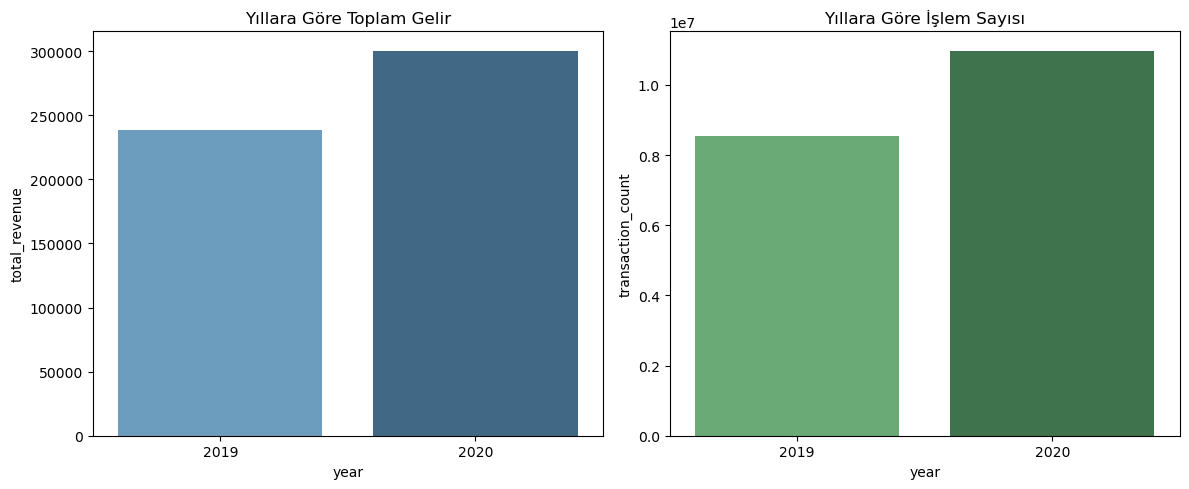

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=yearly_summary, x='year', y='total_revenue', palette='Blues_d')
plt.title('Yıllara Göre Toplam Gelir')

plt.subplot(1,2,2)
sns.barplot(data=yearly_summary, x='year', y='transaction_count', palette='Greens_d')
plt.title('Yıllara Göre İşlem Sayısı')

plt.tight_layout()
plt.show()

  campaign_flag  avg_price  transaction_count
0             0   0.027581            9769587
1             1   0.027589            9767443


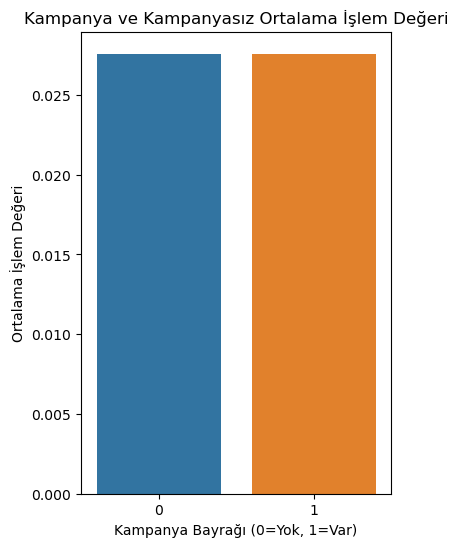

In [ ]:
campaign_summary = df.groupby('campaign_flag').agg(
    avg_price=('price', 'mean'),
    transaction_count=('price', 'count')
).reset_index()

print(campaign_summary)

plt.figure(figsize=(4,6))
sns.barplot(data=campaign_summary, x='campaign_flag', y='avg_price')
plt.title('Kampanya ve Kampanyasız Ortalama İşlem Değeri')
plt.xlabel('Kampanya Bayrağı')
plt.ylabel('Ortalama İşlem Değeri')
plt.show()

  is_returning_customer   total_spend  unique_customers
0                     0   46078.03125            466627
1                     1  492847.59375            834370


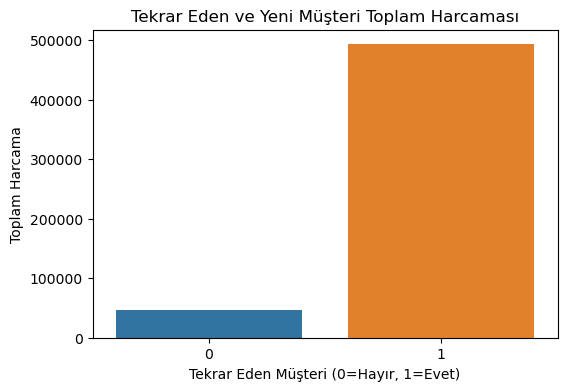

In [ ]:
customer_type_summary = df.groupby('is_returning_customer').agg(
    total_spend=('price', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

print(customer_type_summary)

plt.figure(figsize=(6,4))
sns.barplot(data=customer_type_summary, x='is_returning_customer', y='total_spend')
plt.title('Tekrar Eden ve Yeni Müşteri Toplam Harcaması')
plt.xlabel('Tekrar Eden Müşteri')
plt.ylabel('Toplam Harcama')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537030 entries, 0 to 19537029
Data columns (total 12 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   customer_id                  category      
 1   article_id                   category      
 2   t_dat                        datetime64[ns]
 3   price                        float32       
 4   sales_channel_id             category      
 5   campaign_flag                category      
 6   year                         int64         
 7   week_number                  int64         
 8   period                       category      
 9   is_returning_customer        category      
 10  total_customer_transactions  int64         
 11  total_customer_spend         float32       
dtypes: category(6), datetime64[ns](1), float32(2), int64(3)
memory usage: 1012.1 MB


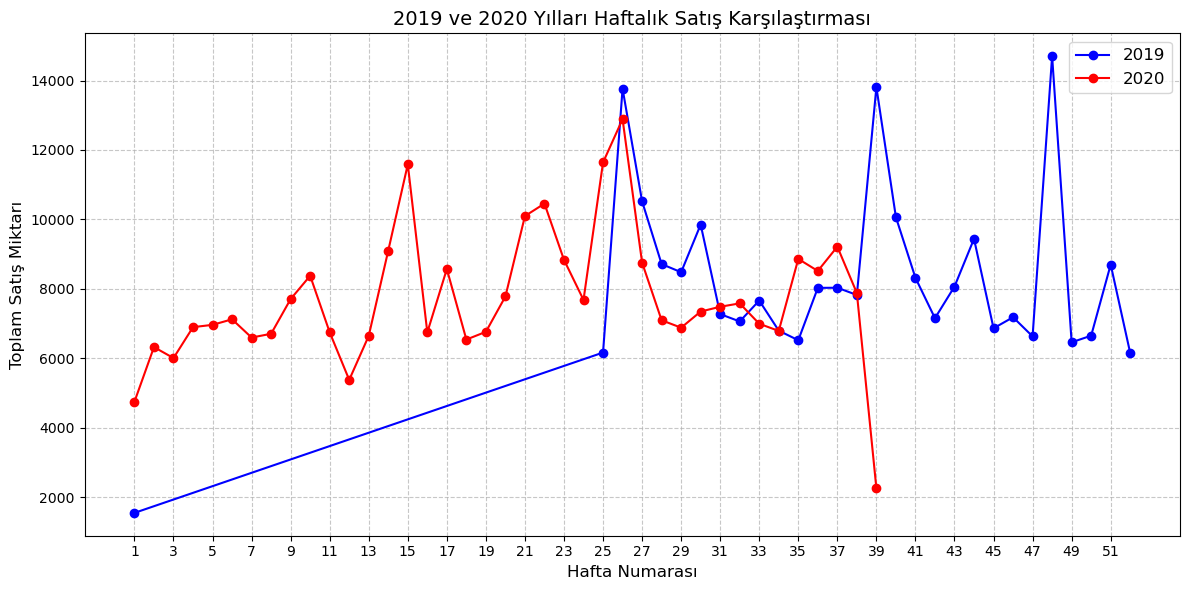

In [ ]:
import numpy as np
weekly_sales = df.groupby(['year', 'week_number'])['price'].sum().reset_index()


sales_2019 = weekly_sales[weekly_sales['year'] == 2019]
sales_2020 = weekly_sales[weekly_sales['year'] == 2020]


plt.figure(figsize=(12, 6))


plt.plot(sales_2019['week_number'], 
         sales_2019['price'], 
         label='2019', 
         color='blue', 
         marker='o')

plt.plot(sales_2020['week_number'], 
         sales_2020['price'], 
         label='2020', 
         color='red', 
         marker='o')


plt.xlabel('Hafta Numarası', fontsize=12)
plt.ylabel('Toplam Satış Miktarı', fontsize=12)
plt.title('2019 ve 2020 Yılları Haftalık Satış Karşılaştırması', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.xticks(np.arange(1, 53, step=2))

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import ttest_ind

campaign_prices = df[df['campaign_flag'] == 1]['price']
non_campaign_prices = df[df['campaign_flag'] == 0]['price']

t_stat, p_value = ttest_ind(campaign_prices, non_campaign_prices, equal_var=False)

print(f'T-test sonuçları:\nT istatistiği = {t_stat:.3f}, p-değeri = {p_value:.4f}')

if p_value < 0.05:
    print("Kampanya ve kampanyasız işlemler arasındaki fark istatistiksel olarak anlamlıdır.")
else:
    print("Fark istatistiksel olarak anlamlı değildir.")


T-test sonuçları:
T istatistiği = 0.967, p-değeri = 0.3337
Fark istatistiksel olarak anlamlı değildir.


In [20]:
df['t_dat'] = pd.to_datetime(df['t_dat'])
filtered_df = df[
    (df['t_dat'].dt.month >= 6) & (df['t_dat'].dt.day >= 21) |
    (df['t_dat'].dt.month == 7) |
    (df['t_dat'].dt.month == 8) |
    (df['t_dat'].dt.month == 9) & (df['t_dat'].dt.day <= 22)
]



In [21]:
weekly_sales = filtered_df.groupby(['year', 'week_number'])['price'].sum().reset_index()


sales_2019 = weekly_sales[weekly_sales['year'] == 2019]
sales_2020 = weekly_sales[weekly_sales['year'] == 2020]

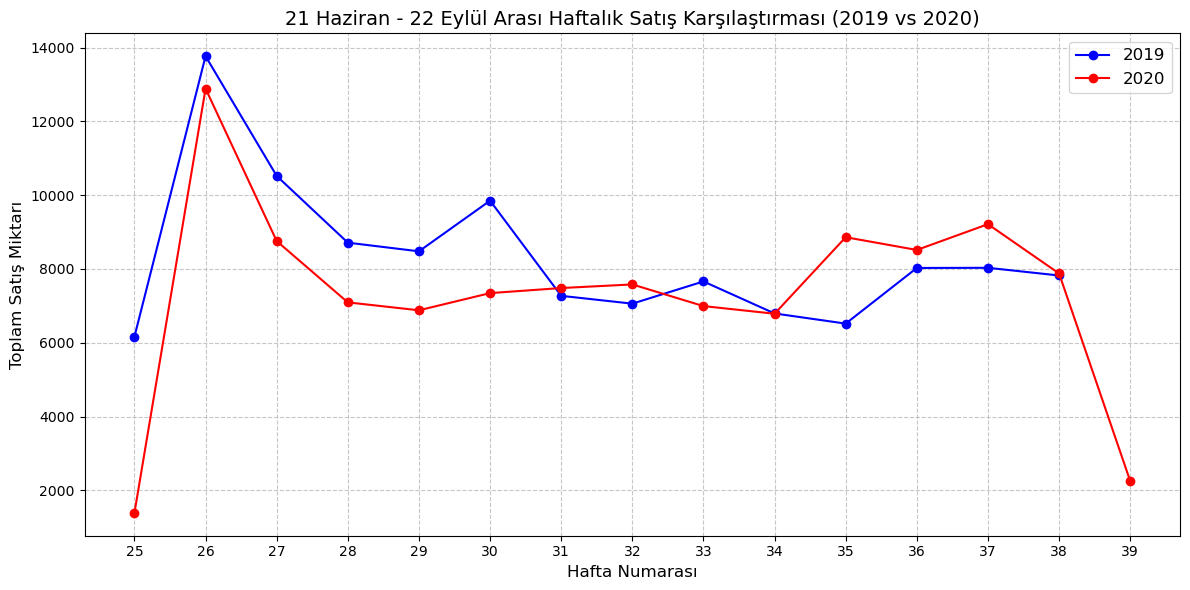

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df['t_dat'] = pd.to_datetime(df['t_dat'])
filtered_df = df[
    ((df['t_dat'].dt.month == 6) & (df['t_dat'].dt.day >= 21)) |
    (df['t_dat'].dt.month == 7) |
    (df['t_dat'].dt.month == 8) |
    ((df['t_dat'].dt.month == 9) & (df['t_dat'].dt.day <= 22))
]

weekly_sales = filtered_df.groupby(['year', 'week_number'])['price'].sum().reset_index()


sales_2019 = weekly_sales[weekly_sales['year'] == 2019]
sales_2020 = weekly_sales[weekly_sales['year'] == 2020]

plt.figure(figsize=(12, 6))


plt.plot(sales_2019['week_number'], 
         sales_2019['price'], 
         label='2019', 
         color='blue', 
         marker='o')


plt.plot(sales_2020['week_number'], 
         sales_2020['price'], 
         label='2020', 
         color='red', 
         marker='o')


plt.xlabel('Hafta Numarası', fontsize=12)
plt.ylabel('Toplam Satış Miktarı', fontsize=12)
plt.title('2019 VS 2020', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

min_week = min(weekly_sales['week_number'])
max_week = max(weekly_sales['week_number'])
plt.xticks(np.arange(min_week, max_week+1, step=1))

plt.tight_layout()
plt.show()

In [29]:
filtered_df.head()

,customer_id,article_id,t_dat,price,sales_channel_id,campaign_flag,year,week_number,period,is_returning_customer,total_customer_transactions,total_customer_spend
0,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,733029001,2019-06-21,0.02,1,0,2019,25,2019 Summer,1,21,0.53
1,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,689814008,2019-06-21,0.01,1,1,2019,25,2019 Summer,1,21,0.53
2,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,762248001,2019-06-21,0.07,1,0,2019,25,2019 Summer,1,21,0.53
3,8682634de26dcd6161c5828570ad7604d12d1a90ab92e4...,774191005,2019-06-21,0.01,1,0,2019,25,2019 Summer,1,21,0.53
4,878aa4dc40ad0e0ba9894198f7155f7bf8aa83dcc02599...,758050001,2019-06-21,0.02,1,1,2019,25,2019 Summer,1,25,0.53


In [30]:
filtered_df.shape

(8751868, 12)

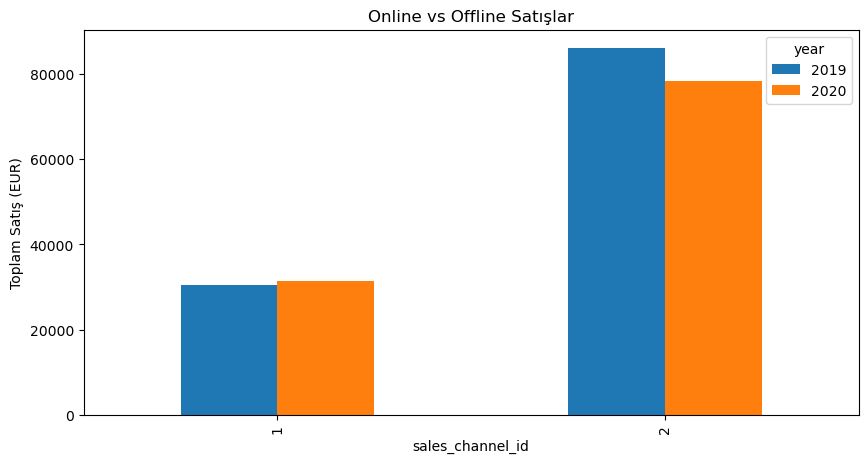

In [31]:
channel_sales = filtered_df.groupby(['sales_channel_id', 'year'])['price'].sum().unstack()
channel_sales.plot(kind='bar', figsize=(10, 5), title='Online vs Offline Satışlar')
plt.ylabel('Toplam Satış (EUR)')
plt.show()

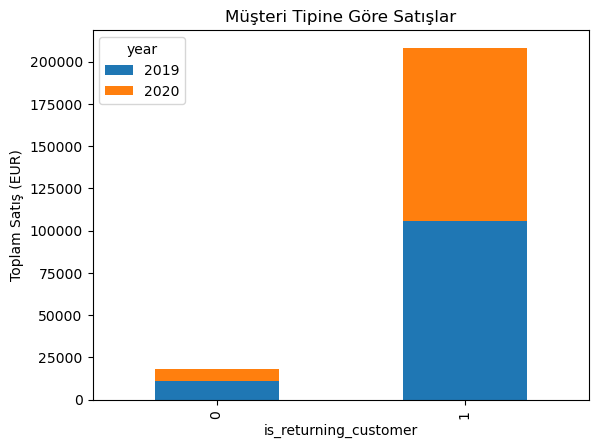

In [32]:
returning_sales = filtered_df.groupby(['is_returning_customer', 'year'])['price'].sum().unstack()
returning_sales.plot(kind='bar', stacked=True, title='Müşteri Tipine Göre Satışlar')
plt.ylabel('Toplam Satış (EUR)')
plt.show()

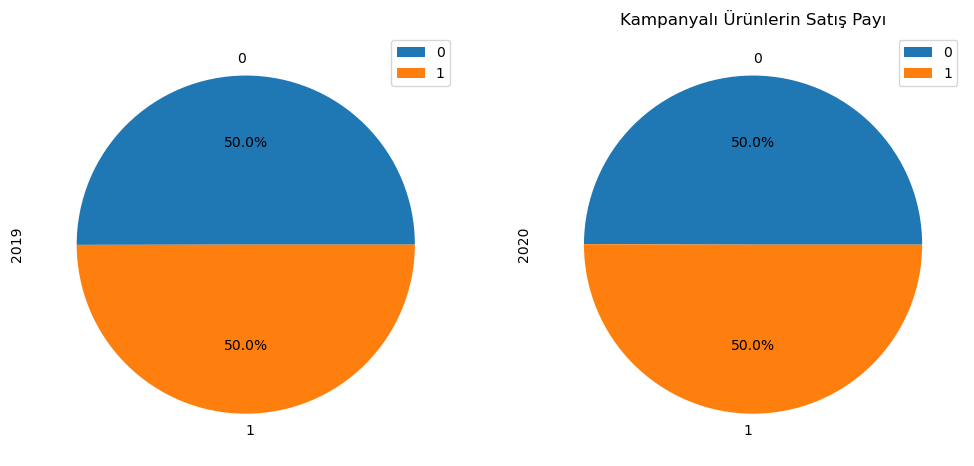

In [33]:
campaign_sales = filtered_df.groupby(['campaign_flag', 'year'])['price'].sum().unstack()
campaign_sales.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%')
plt.title('Kampanyalı Ürünlerin Satış Payı')
plt.show()

In [ ]:
print(filtered_df.groupby('year')['price'].describe())


weekly_sales_pivot = weekly_sales.pivot(index='week_number', columns='year', values='price')
weekly_sales_pivot['growth_rate'] = (weekly_sales_pivot[2020] - weekly_sales_pivot[2019]) / weekly_sales_pivot[2019] * 100
print(weekly_sales_pivot)

          count      mean       std  min   25%   50%   75%   max
year                                                            
2019  4638607.0  0.025154  0.017581  0.0  0.01  0.02  0.03  0.51
2020  4113261.0  0.026722  0.017510  0.0  0.02  0.02  0.03  0.51
year                 2019          2020  growth_rate
week_number                                         
25            6163.449707   1387.849976   -77.482574
26           13768.379883  12888.429688    -6.391095
27           10521.269531   8756.099609   -16.777157
28            8712.799805   7094.069824   -18.578758
29            8478.160156   6879.839844   -18.852207
30            9851.259766   7345.379883   -25.437153
31            7271.600098   7483.000000     2.907199
32            7059.459961   7580.619629     7.382430
33            7661.509766   6993.580078    -8.717991
34            6793.899902   6786.449707    -0.109660
35            6518.449707   8860.839844    35.934772
36            8027.290039   8515.009766     6.07577

In [ ]:
df['customer_id'].sum()

/Users/sinan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


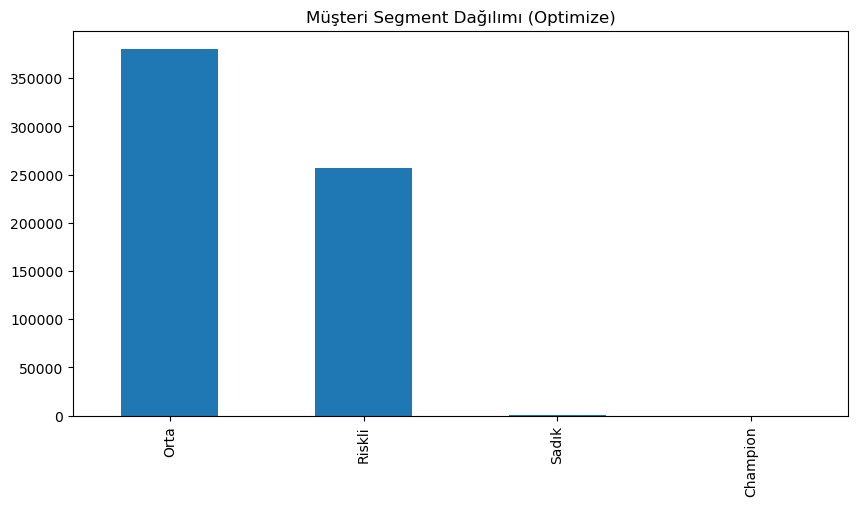

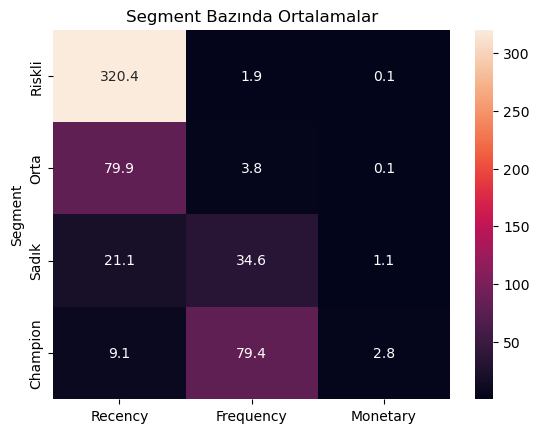

In [36]:
sample_df = df.sample(frac=0.1, random_state=42)  
rfm = sample_df.groupby('customer_id').agg(
    Recency=('t_dat', lambda x: (sample_df['t_dat'].max() - x.max()).days),
    Frequency=('article_id', 'count'),
    Monetary=('price', 'sum')
)

rfm['R_Score'] = pd.cut(rfm['Recency'], bins=5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1,2,3,4,5])

rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)


rfm['Segment'] = pd.cut(rfm['RFM_Score'], 
                        bins=[0, 5, 8, 11, 15],
                        labels=['Riskli', 'Orta', 'Sadık', 'Champion'])


rfm['Segment'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Müşteri Segment Dağılımı (Optimize)')
plt.show()


sns.heatmap(rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean(),
            annot=True, fmt=".1f")
plt.title('Segment Bazında Ortalamalar')
plt.show()